In [130]:
import os

import pandas as pd
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [133]:
_OUTPUT_DIRECTORY = '/home/ec2-user/SageMaker/results/'


ldirs = os.listdir(_OUTPUT_DIRECTORY)

# Index and config of runs
runs = {}
for run in ldirs:
    try:
        run_ = run.split('_')
        runs[run] = {'pool':run_[0].split('$')[1],
                    'dataset':run_[1].split('$')[1],
                    'ki':run_[2].split('$')[1],
                    'kr':run_[3].split('$')[1],
                    'e':run_[4].split('$')[1],
                    's':run_[5].split('$')[1],
                    'r':run_[6].split('$')[1]
                }
    except:
        pass
    
# List of datasets tested
ldatasets = list(set([runs[k]['dataset'] for k in runs.keys()]))
print(ldatasets)

def get_run_by_dataset(dataset, runs):
    
    runs_ = {}
    
    for k in runs.keys():
        if runs[k]['dataset'] == dataset:
            runs_[k] = runs[k]
    
    return runs_

['load-wine', 'breast-cancer', 'half-moons']


In [47]:
dataset = 'breast-cancer'
lruns = get_run_by_dataset(dataset, runs)

In [134]:
runs_ = {}
res_ = {}
for k in list(runs.keys()):
    
    try:
        runs_[k] = runs[k]

        df = pd.read_csv(_OUTPUT_DIRECTORY+k+'/PREDS_sampling.csv', index_col=0)    
        competitors = [c for c in df.columns if c!='y_pool_discr']
        res_[k] = {c:f1_score(df.loc[:,'y_pool_discr'], df.loc[:,c], pos_label=1) for c in competitors}

        #runs_[k] = {**runs_[k], **res}
        
    except:
        pass
    
df = pd.concat((pd.DataFrame(runs_).T, pd.DataFrame(res_).T), axis=1)
df = df.melt(id_vars=['pool','dataset','ki','kr','e','s','r'], 
        var_name="competitor", 
        value_name="f1-score")

df = df.astype({'ki': 'int32', 'kr': 'int32', 'e': 'int32', 's': 'float', 'r': 'int32'})
df.head()

#tmp.groupby(['pool','dataset','ki','kr','e','s','r','competitor']).mean()

,pool,dataset,ki,kr,e,s,r,competitor,f1-score
0,Basic,breast-cancer,0,1,1,0.01,0,P2G-xgb,NaN
1,Basic,breast-cancer,10,0,5,0.01,0,P2G-xgb,0.881151
2,AutoGluon,load-wine,10,0,0,0.01,1,P2G-xgb,0.944933
3,AutoGluon,load-wine,1,0,2,0.01,2,P2G-xgb,NaN
4,Basic,load-wine,3,10,2,0.01,2,P2G-xgb,0.553323


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


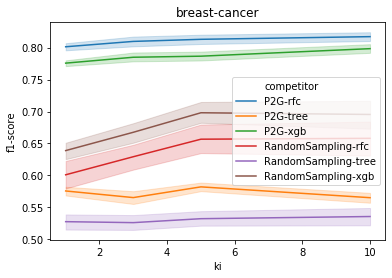

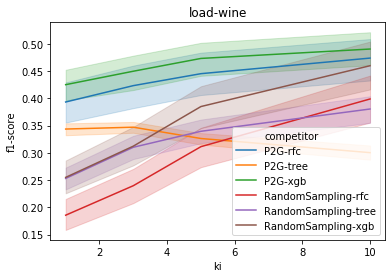

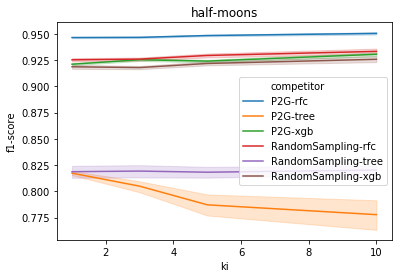

In [135]:
for d in df.dataset.unique():

    tmp = df[df.dataset==d][df.pool=="Basic"]

    tmp = tmp.groupby(['pool','dataset','ki','kr','e','s','r','competitor']).mean()
    tmp = tmp.reset_index()
    
    plt.figure()
    ax = sns.lineplot(x="ki", y="f1-score", hue="competitor", data=tmp)
    ax.set_title(d)

In [136]:
tmp

,pool,dataset,ki,kr,e,s,r,competitor,f1-score
0,Basic,half-moons,0,0,0,0.01,0,P2G-rfc,NaN
1,Basic,half-moons,0,0,0,0.01,0,P2G-tree,NaN
2,Basic,half-moons,0,0,0,0.01,0,P2G-xgb,NaN
3,Basic,half-moons,0,0,0,0.01,0,RandomSampling-rfc,NaN
4,Basic,half-moons,0,0,0,0.01,0,RandomSampling-tree,NaN
...,...,...,...,...,...,...,...,...,...
2695,Basic,half-moons,10,10,5,0.01,2,P2G-tree,0.864686
2696,Basic,half-moons,10,10,5,0.01,2,P2G-xgb,0.950554
2697,Basic,half-moons,10,10,5,0.01,2,RandomSampling-rfc,0.962625
2698,Basic,half-moons,10,10,5,0.01,2,RandomSampling-tree,0.831587
